# PyLab 3 - Radioactive Decay
### Author: Ayush Pandhi (1003227457)
### Date: October 2, 2018

In [1]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pylab

In [2]:
#Defining the linear model function
def f(x, a, b):
    return a*x + b

#Defining the exponential model function
def g(x, a, b):
    return b*(np.exp(a*x))

In [3]:
#Loading the radioactive decay data file
sample = np.loadtxt('RadioactiveDecay_TuesdayOct2_2018_decay.txt', skiprows=2, usecols=(0,))
count = np.loadtxt('RadioactiveDecay_TuesdayOct2_2018_decay.txt', skiprows=2, usecols=(1,))

#Loading the background radiation data file
sample_bg = np.loadtxt('RadioactiveDecay_TuesdayOct2_2018_background.txt', skiprows=2, usecols=(0,))
count_bg = np.loadtxt('RadioactiveDecay_TuesdayOct2_2018_background.txt', skiprows=2, usecols=(1,))

In [4]:
#Getting the mean background radiation
mean_count_bg = np.mean(count_bg)

#Adjusting decay data count by subtracting mean background count
count = count - mean_count_bg

In [5]:
#Defining N, t and dt
N = 60
dt = 20
t = np.linspace(0, N*dt, N)

#Getting count rate and the standard deviation for each
rate = count/dt
sigma = (count**0.5)
sigmabg = (count_bg**0.5)
sigma_signal = ((sigma**2) + (sigmabg)**2)**0.5

In [6]:
#Natural log of the decay count and the error propgation
logy = np.log2(count)
logsigma = np.absolute(sigma_signal/count)

#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, t, logy, (1,0), logsigma, True)
lin_output = f(t, p_opt_1[0], p_opt_1[1])

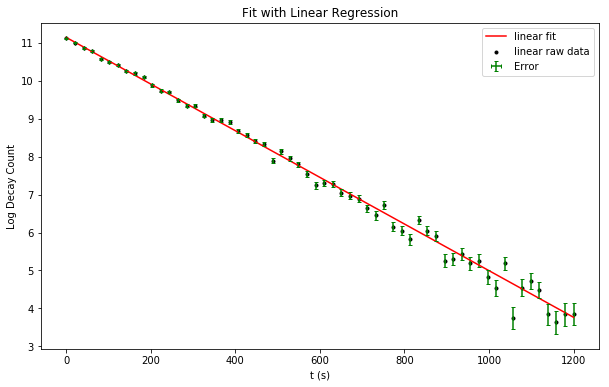

In [21]:
#Plots of linear regression
plt.figure(figsize=(10,6))
plt.scatter(t, logy, label = 'linear raw data', marker='.', color='k')
plt.plot(t, lin_output, 'r-', label = 'linear fit')
plt.title('Fit with Linear Regression')
plt.xlabel('t (s)')
plt.ylabel('Log Decay Count')
plt.errorbar(t, logy, xerr=0, yerr=logsigma, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

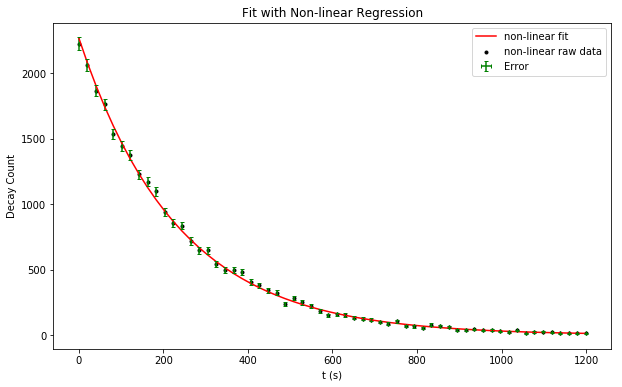

In [23]:
#Non-linear regression
p_opt_2, p_cov_2 = curve_fit(g, t, count, (0.006, count[0]), sigma_signal, True)
nonlin_output = g(t, p_opt_2[0], p_opt_2[1]) 

#Plots of non-linear regression
plt.figure(figsize=(10,6))
plt.scatter(t, count, label = 'non-linear raw data', marker='.', color='k')
plt.plot(t, nonlin_output, 'r-', label = 'non-linear fit')
plt.title('Fit with Non-linear Regression')
plt.xlabel('t (s)')
plt.ylabel('Decay Count')
plt.errorbar(t, count, xerr=0, yerr=sigma_signal, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

In [24]:
#Computing half-life for linear regression method
lin_halflife = -(1/p_opt_1[0])

#Computing half-life for non-linear regression method
nonlin_halflife = -0.69314718056*(1/p_opt_2[0])

print('The half life with linear regression: ', lin_halflife, 's')
print('The half life with non-linear regression: ', nonlin_halflife, 's')
print('The theoretical half life is: 156 s')

The half life with linear regression:  162.6652612807043 s
The half life with non-linear regression:  161.26829694174384 s
The theoretical half life is: 156 s


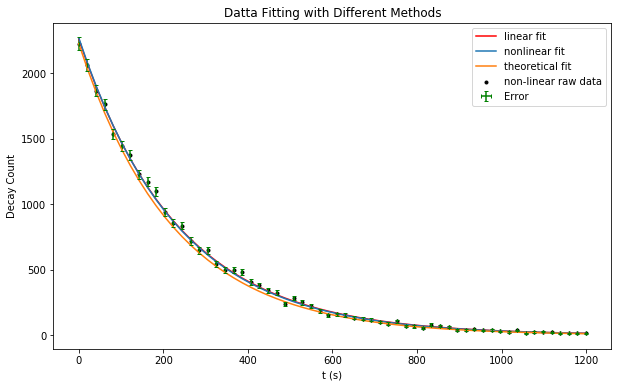

In [31]:
#Overplotting linear fit, non-linear fit and theorethical
plt.figure(figsize=(10,6))

#Raw data
plt.scatter(t, count, label = 'non-linear raw data', marker='.', color='k')

#Linear fit
lin_fit = 2**(p_opt_1[0]*t + p_opt_1[1])
plt.plot(t, lin_fit, 'r-', label='linear fit')

#Nonlinear fit
nonlin_fit = nonlin_output
plt.plot(t, nonlin_fit, label='nonlinear fit')

#Theoretical fit
theo_fit = (count[0])*(0.5**(t / 156)) #half life is 2.6min = 156 sec
plt.plot(t, theo_fit, label='theoretical fit') 
plt.title('Datta Fitting with Different Methods')
plt.xlabel('t (s)')
plt.ylabel('Decay Count')
plt.errorbar(t, count, xerr=0, yerr=sigma_signal, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

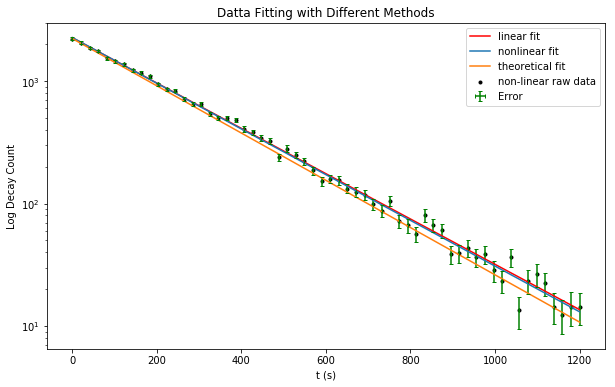

In [33]:
#Producing the same plot but with a log y axis

#Overplotting linear fit, non-linear fit and theorethical
plt.figure(figsize=(10,6))

#Raw data
plt.scatter(t, count, label = 'non-linear raw data', marker='.', color='k')

#Linear fit
lin_fit = 2**(p_opt_1[0]*t + p_opt_1[1])
plt.plot(t, lin_fit, 'r-', label='linear fit')

#Nonlinear fit
nonlin_fit = nonlin_output
plt.plot(t, nonlin_fit, label='nonlinear fit')

#Theoretical fit
theo_fit = (count[0])*(0.5**(t / 156)) #half life is 2.6min = 156 sec
plt.plot(t, theo_fit, label='theoretical fit') 
plt.title('Datta Fitting with Different Methods')
plt.yscale('log')
plt.xlabel('t (s)')
plt.ylabel('Log Decay Count')
plt.errorbar(t, count, xerr=0, yerr=sigma_signal, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

In [36]:
#Calculating standard deviation
sigma_a_1 = np.sqrt(p_cov_1[0,0])/((p_opt_1[0])**2) #linear regression
sigma_a_2 = np.sqrt(p_cov_2[0,0])/((p_opt_2[0])**2) #nonlinear regression
print('Standard Deviation (Linear Model): ', sigma_a_1)
print('Standard Deviation (Non-linear Model): ', sigma_a_2)

#Calculating chi squared
chi_sq = (1/65)*np.sum(((logy - lin_output)/logsigma)**2)
chi_sq2 = (1/65)*np.sum(((count - nonlin_output)/sigma_signal)**2)
print('Chi Squared Reduced (linear): ', chi_sq)
print('Chi Squared Reduced (nonlinear): ', chi_sq2)

Standard Deviation (Linear Model):  0.7652356266399463
Standard Deviation (Non-linear Model):  1.5468329387848176
Chi Squared Reduced (linear):  2.3041283897351224
Chi Squared Reduced (nonlinear):  1.1757922324745351
